In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from pprint import pp

from utils import CONFIG

In [66]:
top_k = 50

drop_columns = [
    "device",
    "learning_rate",
    "batch_size",
    "top_k",
    "seed",
    "epochs",
    "model",
    "datasets",
    "log"
]

if False:
    for k in CONFIG.top_k:
        if k != top_k:
            drop_columns.extend([f"Precision@{k}", f"Recall@{k}", f"NDCG@{k}"])

print(drop_columns)

['device', 'learning_rate', 'batch_size', 'top_k', 'seed', 'epochs', 'model', 'datasets', 'log']


In [67]:
files = os.listdir("logs")
settings = {}

for fname in files:
    with open(f"logs/{fname}", "r", encoding="utf-8") as fin:
        lines = list(fin)
        epochs, loss, *res = lines[-1].strip().split("\t")

        d = json.loads(lines[0])

        d["Epochs"] = int(epochs)
        d["Loss"] = float(loss)

        for i, k in enumerate(CONFIG.top_k):
            precision, recall, ndcg = res[i * 3:(i * 3)+3]
            d[f"Precision@{k}"] = float(precision)
            d[f"Recall@{k}"] = float(recall)
            d[f"NDCG@{k}"] = float(ndcg)

        settings[fname[:-4]] = d

df = pd.DataFrame(settings).T.convert_dtypes()
df = df.drop(columns=drop_columns)

df

,n_layers,embedding_dim,dataset,fusion_modalities,autoencoder,multimodal,single_branch,bidirectional,freeze,Epochs,...,Recall@10,NDCG@10,Precision@20,Recall@20,NDCG@20,Precision@50,Recall@50,NDCG@50,early_stop_window,early_stop_threshold
2025-01-15T18:43:58,0,64,dbbook,mean,False,False,False,False,True,218,...,0.0645,0.064,0.0339,0.1005,0.0786,0.0229,0.1702,0.1038,<NA>,<NA>
2025-01-15T18:44:19,0,64,dbbook,mean,False,False,False,True,True,215,...,0.0637,0.0628,0.0327,0.1,0.0771,0.0226,0.1699,0.1024,<NA>,<NA>
2025-01-15T18:44:33,0,128,dbbook,mean,False,False,False,False,True,131,...,0.0755,0.0746,0.037,0.1118,0.0892,0.0255,0.1888,0.1174,<NA>,<NA>
2025-01-15T18:44:48,0,128,dbbook,mean,False,False,False,True,True,133,...,0.0747,0.0732,0.0364,0.1114,0.0882,0.0246,0.1855,0.1149,<NA>,<NA>
2025-01-15T18:45:01,0,256,dbbook,mean,False,False,False,False,True,89,...,0.082,0.0815,0.0394,0.1211,0.097,0.0262,0.1975,0.1247,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-16T17:30:40,2,128,dbbook,mean,True,True,False,False,True,213,...,0.0833,0.0817,0.0428,0.1274,0.0996,0.0301,0.2232,0.1341,100,0.05
2025-01-16T17:33:15,2,128,dbbook,mean,False,True,True,False,True,461,...,0.0876,0.084,0.0444,0.1346,0.1031,0.0301,0.2273,0.1364,100,0.05
2025-01-16T17:35:10,2,128,dbbook,mean,False,True,False,False,True,447,...,0.0955,0.0929,0.0463,0.1418,0.1112,0.0311,0.2343,0.1447,100,0.05
2025-01-16T17:39:19,2,128,dbbook,mean,False,True,False,False,True,463,...,0.0883,0.0862,0.0449,0.1354,0.1049,0.0307,0.2297,0.139,100,0.05


In [68]:
df.where(
    (df["embedding_dim"] == 256) & (df["dataset"] == "dbbook") & (df["fusion_modalities"] == "max")
).groupby(
    ["bidirectional", "multimodal", "n_layers"]
)[["Precision@50", "Recall@50", "NDCG@50", "Loss", "Epochs"]].mean()

Precision@50  Recall@50  NDCG@50    Loss  \
bidirectional multimodal n_layers                                             
False         True       0               0.0305      0.229   0.1448    0.01   
                         1               0.0299     0.2301   0.1462  0.0168   
                         2               0.0311     0.2394   0.1491  0.0314   
                         3               0.0319     0.2446    0.152  0.0491   
                         4               0.0318     0.2438   0.1494  0.0699   
True          True       0               0.0304     0.2319    0.144  0.0097   
                         1               0.0269     0.2116   0.1264    0.01   
                         2               0.0267     0.2109    0.128  0.0099   
                         3               0.0246     0.1964   0.1167  0.0126   
                         4               0.0258     0.2027   0.1205  0.0149   

                                   Epochs  
bidirectional multimodal n_layers          
False         True       0          158.0  
                         1         1000.0  
                         2         1000.0  
                         3         1000.0  
                         4         1000.0  
True          True       0          154.0  
                         1          240.0  
                         2          641.0  
                         3         1000.0  
                         4         1000.0

In [69]:
df.rename(columns={"embedding_dim": "emb_dim", "fusion_modalities": "fusion"}).where(df["multimodal"] == False).groupby("n_layers")[["Precision@10", "Recall@10", "NDCG@10"]].mean()

,Precision@10,Recall@10,NDCG@10
n_layers,,,
0,0.0474,0.073333,0.072283
1,0.0479,0.075917,0.0729
2,0.051083,0.080533,0.0774
3,0.04985,0.0793,0.074933
4,0.050033,0.079383,0.0755


In [70]:
file = os.listdir("logs")[-1]
file_path = f"logs/{file}"

with open(file_path, 'r') as f:
    config_line = f.readline().strip()
    config = json.loads(config_line)

data = pd.read_csv(file_path, sep='\t', skiprows=1)

In [71]:
data

,Epoch,Loss,Precision@5,Recall@5,NDCG@5,Precision@10,Recall@10,NDCG@10,Precision@20,Recall@20,NDCG@20,Precision@50,Recall@50,NDCG@50
0,1,0.6931,0.0026,0.0023,0.0028,0.0023,0.0039,0.0032,0.0022,0.0074,0.0047,0.0021,0.0159,0.0078
1,2,0.6928,0.0052,0.0045,0.0060,0.0050,0.0088,0.0073,0.0043,0.0147,0.0097,0.0036,0.0289,0.0148
2,3,0.6924,0.0109,0.0104,0.0131,0.0091,0.0160,0.0143,0.0071,0.0242,0.0177,0.0052,0.0431,0.0243
3,4,0.6921,0.0164,0.0149,0.0197,0.0131,0.0229,0.0212,0.0098,0.0334,0.0254,0.0067,0.0558,0.0333
4,5,0.6917,0.0222,0.0200,0.0269,0.0172,0.0297,0.0283,0.0125,0.0421,0.0332,0.0083,0.0685,0.0424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,399,0.1168,0.0728,0.0555,0.0828,0.0568,0.0855,0.0843,0.0439,0.1314,0.1028,0.0304,0.2254,0.1368
399,400,0.1178,0.0729,0.0555,0.0828,0.0568,0.0855,0.0842,0.0440,0.1314,0.1027,0.0304,0.2255,0.1368
400,401,0.1170,0.0729,0.0555,0.0827,0.0568,0.0856,0.0842,0.0439,0.1313,0.1026,0.0304,0.2257,0.1367
401,402,0.1167,0.0731,0.0556,0.0829,0.0568,0.0856,0.0843,0.0440,0.1316,0.1028,0.0304,0.2256,0.1368


In [72]:
epochs = data["Epoch"]
loss = data["Loss"]

{'n_layers': 2,
 'device': 'cuda',
 'batch_size': 2048,
 'embedding_dim': 128,
 'learning_rate': 0.001,
 'dataset': 'dbbook',
 'epochs': 1000,
 'model': 'lmf-mmlgcn',
 'fusion_modalities': 'mean',
 'top_k': [5,
           10,
           20,
           50],
 'seed': 19,
 'autoencoder': False,
 'multimodal': True,
 'single_branch': False,
 'bidirectional': False,
 'early_stop_window': 50,
 'early_stop_threshold': 0.03,
 'freeze': True,
 'log': True,
 'datasets': {'dbbook': ['images',
                         'text'],
              'ml1m': ['audio',
                       'images',
                       'text',
                       'video']}}

Epoch           403.0000
Loss              0.1173
Precision@5       0.0730
Recall@5          0.0555
NDCG@5            0.0828
Precision@10      0.0568
Recall@10         0.0855
NDCG@10           0.0842
Precision@20      0.0440
Recall@20         0.1315
NDCG@20           0.1028
Precision@50      0.0304
Recall@50         0.2255
NDCG@50           0.136

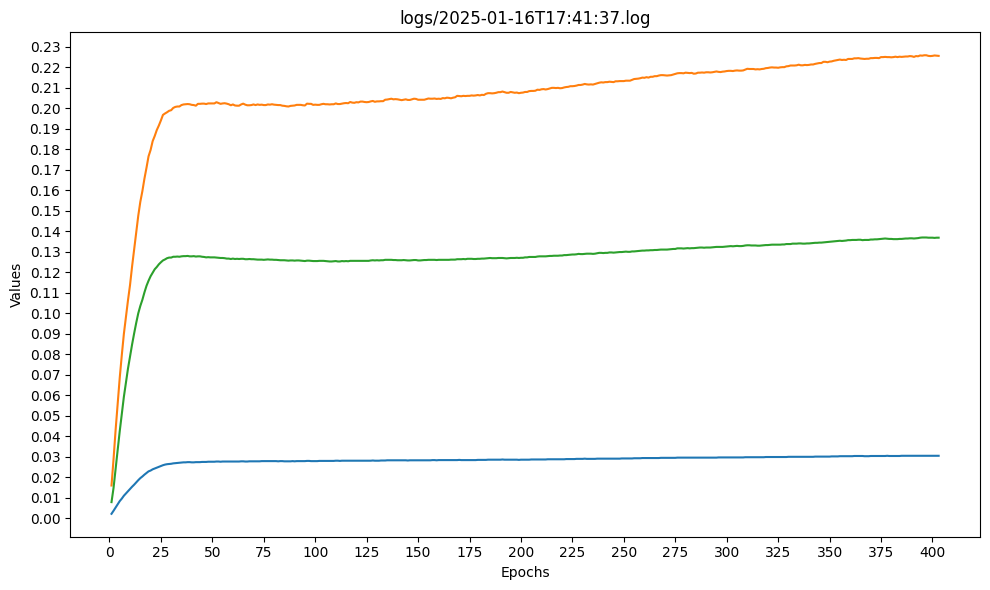

In [76]:
pp(config, width=1)
print()
print(data.iloc[-1])

plt.figure(figsize=(10, 6))

#plt.plot(epochs, loss, label="Loss")

for k in [50]:
    plt.plot(epochs, data[f"Precision@{k}"], label=f"Precision@{k}")
    plt.plot(epochs, data[f"Recall@{k}"], label=f"Recall@{k}")
    plt.plot(epochs, data[f"NDCG@{k}"], label=f"NDCG@{k}")


plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title(file_path)
#plt.legend()

plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=30))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=20))
#plt.yscale("log")

plt.tight_layout()
plt.show()